In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm

In [26]:
#Load dataset and replace classes names with numbers
iris_data = pd.read_csv("../datasets/iris.csv")
classes_map = {"Iris-setosa":0, "Iris-virginica":1, "Iris-versicolor":2}
iris_data["class"].replace(classes_map, inplace=True)

In [27]:
# Train/test 80/20 split
test_data = iris_data.sample(frac=.2)
training_data = iris_data.drop(test_data.index)

In [28]:
def graph_column_distributions(data, title):
    plt.figure(figsize=(18,6))

    for i, column in enumerate(data.columns):
        if column != 'class':
            plt.subplot(1,4,i+1)
            plt.xlabel(column)
            plt.ylabel(title)
            data[column].hist()

In [29]:
# Extract the data for each class
classes_data = { k: training_data[training_data["class"] == v] for k,v in classes_map.items() }

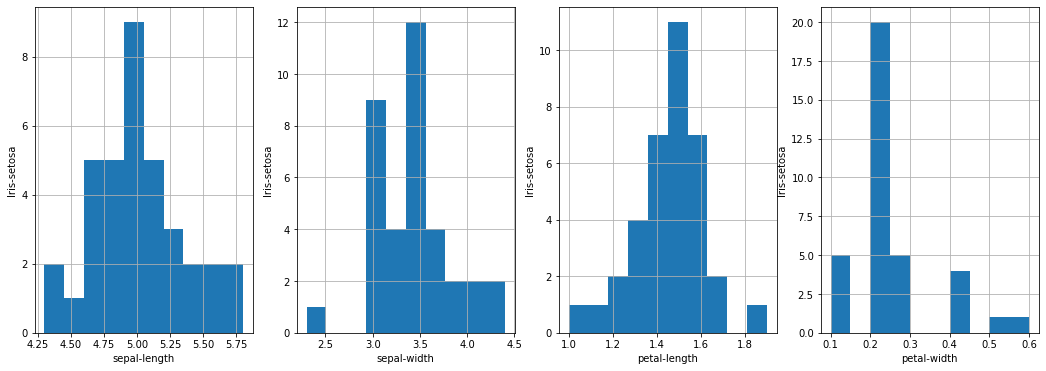

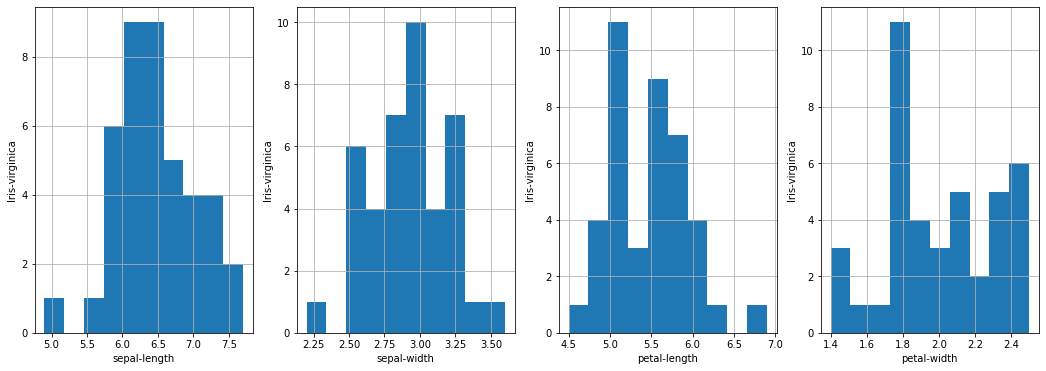

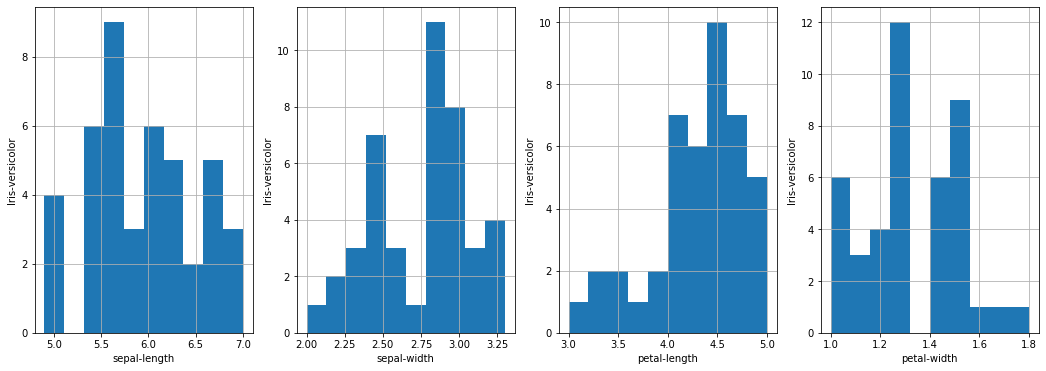

In [30]:
for clazz, data in classes_data.items():
    graph_column_distributions(data, clazz)

In [31]:
# These are the maximum likelihood estimators for a normal distribution
# Mean MLE
def max_likelihood_mean(data):
    return sum(data)/len(data)

# Var MLE
def max_likelihood_variance(data):
    mu_hat = max_likelihood_mean(data)
    return sum(map(lambda x: (x-mu_hat)**2, data))/(len(data)-1)

In [14]:
# Infer the distribution of the 'petal-length' column for each class
pl_distributions = {k: norm(max_likelihood_mean(data['petal-length']), 
                            max_likelihood_variance(data['petal-length'])**(1/2)) 
                    for k, data in classes_data.items()}

In [34]:
# For each class, print the infered distributions
for clazz, dist in pl_distributions.items():
    print("{} ~ N({:.4f},{:.6f})".format(clazz, dist.mean(), dist.var()))

Iris-setosa ~ N(3.7341,3.201368)
Iris-virginica ~ N(3.7341,3.201368)
Iris-versicolor ~ N(3.7341,3.201368)


In [16]:
# We are going to predict tha a sample S is of class i if Pi(S) > Pj(S) for all j
def predict(row):
    probs = {}
    for clazz, dist in pl_distributions.items():
        probs[clazz] = dist.pdf(row["petal-length"])
    return [p.index(max(p)) for p in zip(*probs.values())]

In [17]:
predictions = predict(test_data)
print("Acc: {:.4f}".format(sum(test_data["class"] == predictions)/len(test_data)))

Acc: 0.2667


In [32]:
# Infer the distribution of each column for each class
columns_distribution = {column : {k: norm(max_likelihood_mean(data[column]), 
                            max_likelihood_variance(data[column])**(1/2)) 
                        for k, data in classes_data.items()} 
                        for column in ['petal-length', 'petal-width', 'sepal-length', 'sepal-width']}

In [33]:
# For each class, print the infered distributions
for column, distributions in columns_distribution.items():
    print(column)
    for clazz, dist in distributions.items():
        print("{} ~ N({:.4f},{:.6f})".format(clazz, dist.mean(), dist.var()))

petal-length
Iris-setosa ~ N(1.4583,0.030500)
Iris-virginica ~ N(5.4561,0.227524)
Iris-versicolor ~ N(4.2628,0.219535)
petal-width
Iris-setosa ~ N(0.2417,0.012786)
Iris-virginica ~ N(2.0049,0.084976)
Iris-versicolor ~ N(1.3186,0.038217)
sepal-length
Iris-setosa ~ N(4.9889,0.120444)
Iris-virginica ~ N(6.4829,0.307451)
Iris-versicolor ~ N(5.9512,0.286368)
sepal-width
Iris-setosa ~ N(3.4111,0.160444)
Iris-virginica ~ N(2.9293,0.083122)
Iris-versicolor ~ N(2.7581,0.104396)


In [22]:
def predict_column(row, column):
    probs = {}
    for clazz, dist in columns_distribution[column].items():
        probs[clazz] = dist.pdf(row[column])
    return [p.index(max(p)) for p in zip(*probs.values())]

In [23]:
for column in ['petal-length', 'petal-width', 'sepal-length', 'sepal-width']:
    predictions = predict_column(test_data, column)
    print("{} Acc: {:.4f}".format(column, sum(test_data["class"] == predictions)/len(test_data)))

petal-length Acc: 0.2667
petal-width Acc: 0.2667
sepal-length Acc: 0.2667
sepal-width Acc: 0.2667
